In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# Load dataset
df=pd.read_csv('/content/student_exam_scores.csv')
df

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [ ]:
# Drop identifier column
df=df.drop('student_id', axis=1)
df

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,8.0,8.8,72.1,45,30.2
1,1.3,8.6,60.7,55,25.0
2,4.0,8.2,73.7,86,35.8
3,3.5,4.8,95.1,66,34.0
4,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...
195,10.5,5.4,94.0,87,42.7
196,7.1,6.1,85.1,92,40.4
197,1.6,6.9,63.8,76,28.2
198,12.0,7.3,50.5,58,42.0


In [ ]:
# Checking null values
df.isnull().sum()

,0
hours_studied,0
sleep_hours,0
attendance_percent,0
previous_scores,0
exam_score,0


In [ ]:
# Checking duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Separate features and target
X=df[['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores']]
y=df['exam_score']

In [ ]:
# Train/test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
# Scale features
scaler=StandardScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
# Convert scaled arrays back to DataFrame
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X.columns,index=X_train.index)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X.columns,index=X_test.index)

In [ ]:
# Create and train Linear Regression model
model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred=model.predict(X_test_scaled)

In [ ]:
# Evaluate on test set
r2_score(y_test,y_pred)

0.8508200959774658

In [ ]:
mean_squared_error(y_test,y_pred)

5.7647739491331915

In [ ]:
model.coef_

array([4.93233262, 1.38671826, 1.64134987, 2.89794172])

In [ ]:
model.intercept_

np.float64(33.613749999999996)

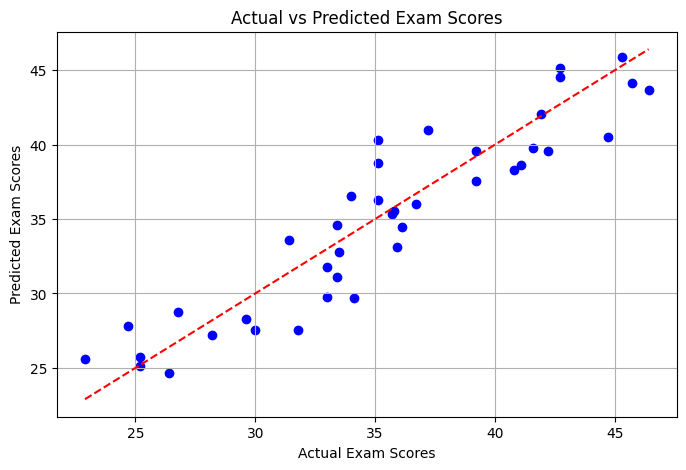

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.grid(True)
plt.show()


In [ ]:
# Predict for a new sample
new_data=pd.DataFrame({
    'hours_studied': [6],
    'sleep_hours': [7],
    'attendance_percent': [80],
    'previous_scores': [65]
})
new_data

,hours_studied,sleep_hours,attendance_percent,previous_scores
0,6,7,80,65


In [ ]:
# Scale new sample with same scaler
new_data_scaled=scaler.transform(new_data)

In [ ]:
# Convert to DataFrame
new_data_scaled=pd.DataFrame(new_data_scaled, columns=X.columns)

In [ ]:
new_data_scaled

,hours_studied,sleep_hours,attendance_percent,previous_scores
0,-0.050927,0.268758,0.333464,-0.10386


In [ ]:
# Predict exam score for new student
model.predict(new_data_scaled)

array([33.98160517])